In [1]:
from PyHessian.pyhessian.hessian import hessian
from PyHessian.density_plot import get_esd_plot
import torch
import torch.nn as nn
import numpy as np
from torchvision import datasets, transforms
# from keras.datasets import mnist
import matplotlib.pyplot as plt 
import time

# PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True
# How to do this?
import os

os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'



In [2]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [3]:
mnist_trainset = datasets.MNIST(root='./data/mnist', train=True, download=True, transform=transforms.ToTensor())
mnist_fashion_trainset = datasets.FashionMNIST(root='./data/fashion_mnist', train=True, download=True, transform=transforms.ToTensor())
cifar_trainset = datasets.CIFAR10(root='./data/cifar10', train=True, download=True, transform=transforms.ToTensor())
# Getting mnist test data
mnist_testset = datasets.MNIST(root='./data/mnist', train=False, download=True, transform=transforms.ToTensor())
mnist_fashion_testset = datasets.FashionMNIST(root='./data/fashion_mnist', train=False, download=True, transform=transforms.ToTensor())
cifar_testset = datasets.CIFAR10(root='./data/cifar10', train=False, download=True, transform=transforms.ToTensor())

torch.manual_seed(42)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_X = mnist_fashion_trainset.data
train_y = mnist_fashion_trainset.targets
test_X = mnist_fashion_testset.data
test_y = mnist_fashion_testset.targets

In [5]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # Using conv layers
        self.conv_layers = nn.Sequential(
            nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32*3*3, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

In [6]:
train_X = (torch.tensor(train_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
test_X = (torch.tensor(test_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
train_y = (torch.tensor(train_y, dtype=torch.int64)).to(device)
test_y = (torch.tensor(test_y, dtype=torch.int64)).to(device)

/tmp/ipykernel_21535/2698481128.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_X = (torch.tensor(train_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
/tmp/ipykernel_21535/2698481128.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  test_X = (torch.tensor(test_X, dtype=torch.float32)/255).unsqueeze(1).to(device)
/tmp/ipykernel_21535/2698481128.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = (torch.tensor(train_y, dtype=torch.int64)).to(device)
/tmp/ipykernel_21535/2698481128.py:4: UserWarning: To copy const

In [7]:
dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(train_X, train_y),
    batch_size=32, shuffle=True)
model = Net().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [8]:
# losses = []
# test_losses = []
# train_losses = []
# for epoch in range(10):
#     for i, (data, target) in enumerate(dataloader):
#         optimizer.zero_grad()
#         output = model(data)
#         #output_test = model(test_X)
#         loss = criterion(output, target)
#         # loss_test = criterion(output_test, test_y)
#         loss.backward()
#         optimizer.step()
#         losses.append(loss.item())
#         if i % 100 == 0:
#             print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}")
#         # output = model(train_X)
#         # loss_train = criterion(output, train_y)
#         # output = model(test_X)
#         # loss_test = criterion(output, test_y)
#         # output_test = model(test_X)
#         # test_losses.append(loss_test.item())
#         # train_losses.append(loss_train.item())
#     #print(loss.item())

In [9]:
losses = []
test_losses = []
train_losses = []
for epoch in range(20):
    for i, (data, target) in enumerate(dataloader):
        optimizer.zero_grad()
        output = model(data)
        #output_test = model(test_X)
        loss = criterion(output, target)
        # loss_test = criterion(output_test, test_y)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())
        if i % 500 == 0:
            # output = model(train_X)
            # loss_train = criterion(output, train_y)
            # output = model(test_X)
            # loss_test = criterion(output, test_y)
            # print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}, test_loss {loss_test.item()}")
            print(f"Epoch {epoch}, step {i}, train_loss {loss.item()}")
            # test_losses.append(loss_test.item())
            # train_losses.append(loss_train.item())

Epoch 0, step 0, train_loss 2.3192672729492188
Epoch 0, step 500, train_loss 0.6429858207702637
Epoch 0, step 1000, train_loss 0.5347763299942017
Epoch 0, step 1500, train_loss 0.3006560206413269
Epoch 1, step 0, train_loss 0.22098097205162048
Epoch 1, step 500, train_loss 0.3534143567085266
Epoch 1, step 1000, train_loss 0.19824345409870148
Epoch 1, step 1500, train_loss 0.4831923246383667
Epoch 2, step 0, train_loss 0.24948447942733765
Epoch 2, step 500, train_loss 0.35143211483955383
Epoch 2, step 1000, train_loss 0.31457746028900146
Epoch 2, step 1500, train_loss 0.3411993384361267
Epoch 3, step 0, train_loss 0.3075181245803833
Epoch 3, step 500, train_loss 0.29947444796562195
Epoch 3, step 1000, train_loss 0.10236681252717972
Epoch 3, step 1500, train_loss 0.1560087502002716
Epoch 4, step 0, train_loss 0.16646257042884827
Epoch 4, step 500, train_loss 0.2891632616519928
Epoch 4, step 1000, train_loss 0.2409742921590805
Epoch 4, step 1500, train_loss 0.2977187931537628
Epoch 5, ste

In [10]:
# Calculate test accuracy
output = model(test_X)
_, predicted = torch.max(output, 1)
correct = (predicted == test_y).sum().item()
accuracy = correct / test_y.size(0)
print(f"Test accuracy: {accuracy}")

Test accuracy: 0.9076


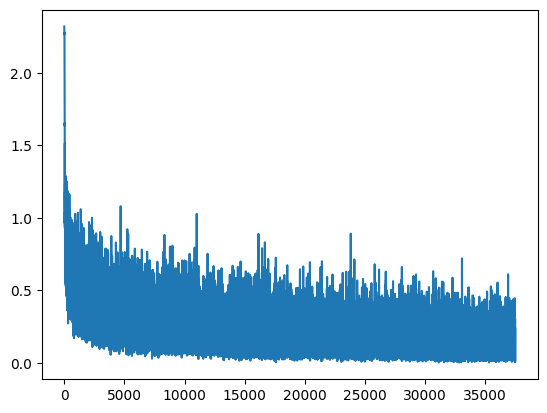

In [11]:
%matplotlib inline
plt.plot(losses)
plt.show()

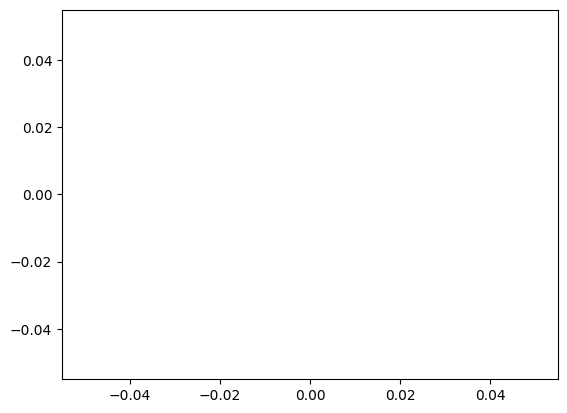

In [12]:
plt.plot(test_losses)
plt.plot(train_losses)
plt.show()

In [13]:
print(torch.cuda.memory_summary(device=None, abbreviated=False))
import gc
for obj in gc.get_objects():
    if torch.is_tensor(obj):
        if obj.is_cuda:
            print(f'Tensor: {obj}, Size: {obj.size()}, Memory: {obj.element_size() * obj.nelement() / 1024**2:.2f} MB')


|===========================================================================|
|                  PyTorch CUDA memory summary, device ID 0                 |
|---------------------------------------------------------------------------|
|            CUDA OOMs: 0            |        cudaMalloc retries: 0         |
|===========================================================================|
|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |
|---------------------------------------------------------------------------|
| Allocated memory      |    953 MiB |    974 MiB | 418620 MiB | 417667 MiB |
|       from large pool |    951 MiB |    973 MiB |   1374 MiB |    423 MiB |
|       from small pool |      1 MiB |      4 MiB | 417246 MiB | 417244 MiB |
|---------------------------------------------------------------------------|
| Active memory         |    953 MiB |    974 MiB | 418620 MiB | 417667 MiB |
|       from large pool |    951 MiB |    973 MiB |   1374 MiB |

In [22]:
hessian_comp = hessian(model, criterion, data=(train_X, train_y), cuda=True)

In [23]:
trace = hessian_comp.trace()
print("The trace of this model is: %.4f"%(np.mean(trace)))

The trace of this model is: 139.3316


In [24]:
# top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=20)
# print("The top two eigenvalues of this model are: ", top_eigenvalues)

Obtained eigendensities and eigenweights in 45.44 seconds


/teamspace/studios/this_studio/DeepHessian/PyHessian/density_plot.py:62: ComplexWarning: Casting complex values to real discards the imaginary part
  density_output[i, j] = np.sum(tmp_result * weights[i, :])


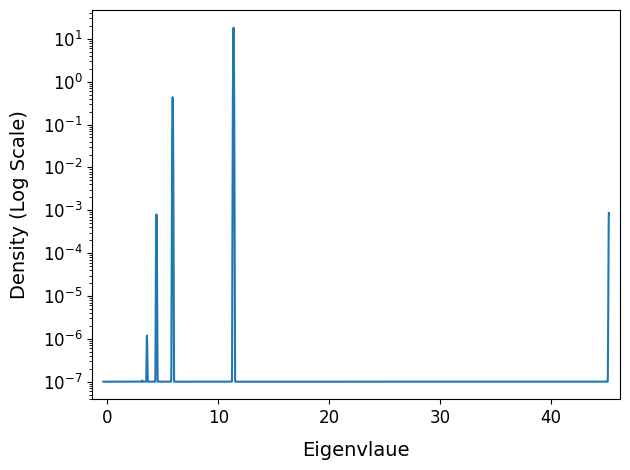

In [25]:
t0 = time.time()
density_eigen, density_weight = hessian_comp.density()
print("Obtained eigendensities and eigenweights in %.2f seconds"%(time.time()-t0))
get_esd_plot(density_eigen, density_weight)

In [26]:
# Save the model
# torch.save(model.state_dict(), 'model_cnn_fashion_mnist.pth')

In [27]:
# top_eigenvalues, top_eigenvector = hessian_comp.eigenvalues(top_n=20)
# print(top_eigenvalues)

In [28]:
# top_eigenvector[0][2].shape